In [1]:
from zipfile import ZipFile
import os
from PIL import Image
import matplotlib.pyplot as plt
import glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from scipy.spatial.distance import cosine



In [2]:
# Update these paths according to your system
base_dir = r"C:\Users\Asus\Pictures\Fashion Recommendation System"
zip_file_path = os.path.join(base_dir, "women-fashion.zip")  # Corrected hyphen in filename
extraction_directory = os.path.join(base_dir, "extracted")  # New extraction folder



In [3]:
# Create extraction directory if needed
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)



In [4]:
# Extract zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)



In [5]:
# Path to extracted images
image_directory = os.path.join(extraction_directory, "women fashion")  # Space in folder name



In [6]:
# Get image paths
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) 
                   if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]



In [7]:
# Initialize model
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)



In [8]:
# Feature extraction functions
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    return preprocess_input(np.expand_dims(img_array, axis=0))

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    return features.flatten() / np.linalg.norm(features.flatten())



In [9]:
# Process all images
all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    all_features.append(extract_features(model, preprocessed_img))
    all_image_names.append(os.path.basename(img_path))



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [35]:
# Recommendation function
def recommend_fashion_items_cnn(input_image_path, top_n=6):
    input_features = extract_features(model, preprocess_image(input_image_path))
    
    similarities = [1 - cosine(input_features, feat) for feat in all_features]
    similar_indices = np.argsort(similarities)[-top_n-1:-1]  # Exclude self
    
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n+1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    for i, idx in enumerate(similar_indices, 1):
        plt.subplot(1, top_n+1, i+1)
        plt.imshow(Image.open(image_paths_list[idx]))
        plt.title(f"Match {i}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


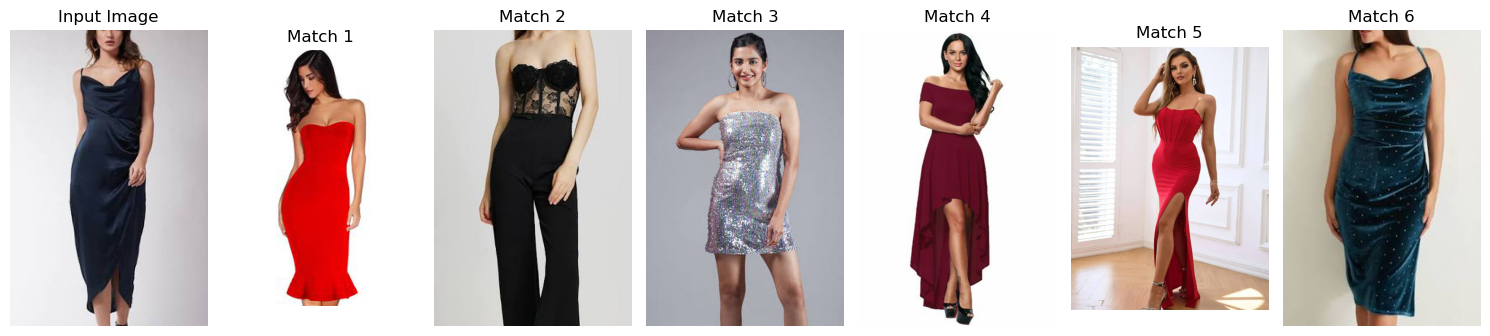

In [37]:
# Example usage (update with actual image name)
input_image_path = os.path.join(image_directory, "dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg")
recommend_fashion_items_cnn(input_image_path)